In [1]:
import humanize
import numpy as np
import pandas as pd
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('./data/CT-clean.csv', header=0)

D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318669 entries, 0 to 318668
Data columns (total 24 columns):
id                       318669 non-null object
state                    318669 non-null object
stop_date                318669 non-null object
stop_time                318447 non-null object
location_raw             318628 non-null object
county_name              318627 non-null object
county_fips              318627 non-null float64
fine_grained_location    317006 non-null object
police_department        318669 non-null object
driver_gender            318669 non-null object
driver_age_raw           318669 non-null int64
driver_age               318395 non-null float64
driver_race_raw          318669 non-null object
driver_race              318669 non-null object
violation_raw            318669 non-null object
violation                318669 non-null object
search_conducted         318669 non-null bool
search_type_raw          4846 non-null object
search_type              484

In [4]:
df.describe()

,county_fips,driver_age_raw,driver_age
count,318627.000000,318669.000000,318395.000000
mean,9008.013775,38.088041,38.119490
std,4.471330,14.463289,14.429378
min,9001.000000,0.000000,15.000000
25%,9003.000000,26.000000,26.000000
50%,9009.000000,35.000000,35.000000
75%,9011.000000,49.000000,49.000000
max,9015.000000,99.000000,99.000000


## Records date range

In [5]:
years = df['id'].apply(lambda x: int(x.split('-')[1]))
years.unique()

array([2013, 2014, 2015], dtype=int64)

In [6]:
first_date = datetime.strptime(df['stop_date'].min(), '%Y-%m-%d')
last_date = datetime.strptime(df['stop_date'].max(), '%Y-%m-%d')

In [7]:
humanize.naturaldelta(last_date - first_date)

'1 year, 5 months'

## Sample rows
### Columns 1-8

In [8]:
df.iloc[:,:8].head()

,id,state,stop_date,stop_time,location_raw,county_name,county_fips,fine_grained_location
0,CT-2013-00001,CT,2013-10-01,00:01,westport,Fairfield County,9001.0,"00000 N I 95 (WESTPORT, T158) X 18 LL"
1,CT-2013-00002,CT,2013-10-01,00:02,mansfield,Tolland County,9013.0,rte 195 storrs
2,CT-2013-00003,CT,2013-10-01,00:07,franklin,New London County,9011.0,Rt 32/whippoorwill
3,CT-2013-00004,CT,2013-10-01,00:10,danbury,Fairfield County,9001.0,I-84
4,CT-2013-00005,CT,2013-10-01,00:10,east hartford,Hartford County,9003.0,"00000 W I 84 (EAST HARTFORD, T043)E.OF XT.56"


### Columns 9-16

In [9]:
df.iloc[:,8:16].head()

,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation
0,State Police,F,69,69.0,Black,Black,Speed Related,Speeding
1,State Police,M,20,20.0,White,White,Moving Violation,Moving violation
2,State Police,M,34,34.0,Hispanic,Hispanic,Speed Related,Speeding
3,State Police,M,46,46.0,Black,Black,Speed Related,Speeding
4,State Police,M,30,30.0,White,White,Speed Related,Speeding


### Columns 17-24

In [10]:
df.iloc[:,16:24].head()

,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,officer_id,stop_duration
0,False,NaN,NaN,False,Ticket,False,1000002754,1-15 min
1,False,NaN,NaN,False,Verbal Warning,False,1000001903,1-15 min
2,False,NaN,NaN,False,Ticket,False,1000002711,1-15 min
3,False,NaN,NaN,False,Written Warning,False,113658284,1-15 min
4,False,NaN,NaN,False,Ticket,False,830814942,1-15 min


## Data Distributions

### Traffic Stop Outcome Breakdown

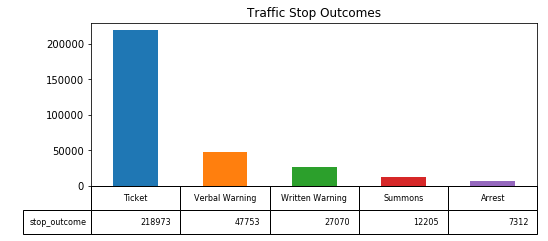

In [11]:
outcome_breakdown = df['stop_outcome'].value_counts().plot.bar(figsize=(8, 3), title='Traffic Stop Outcomes', table=True)
outcome_breakdown.axes.get_xaxis().set_visible(False)
outcome_breakdown.tables[0].scale(1, 2)

In [12]:
df['stop_outcome'].value_counts(normalize=True)

Ticket             0.698895
Verbal Warning     0.152413
Written Warning    0.086399
Summons            0.038955
Arrest             0.023338
Name: stop_outcome, dtype: float64

### Outcome by County

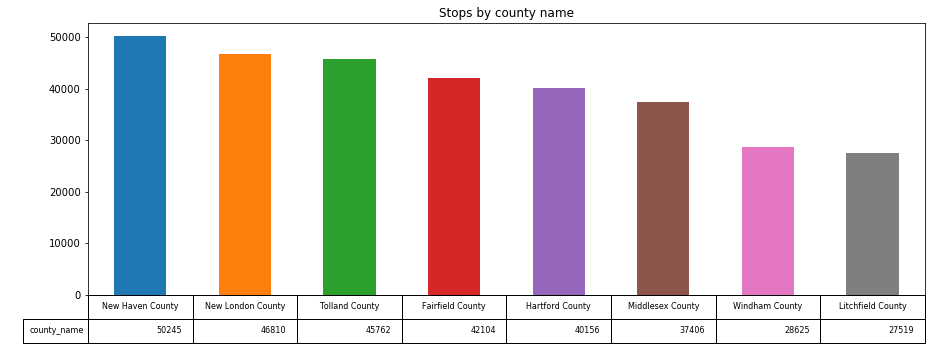

In [13]:
outcomes_by_county = df['county_name'].value_counts().plot.bar(figsize=(15, 5), title='Stops by county name', table=True)
outcomes_by_county.axes.get_xaxis().set_visible(False)
outcomes_by_county.tables[0].scale(1, 2)

### Arrests by Race by County

In [14]:
df.loc[df['stop_outcome'] == 'Arrest'].groupby(['county_name', 'driver_race']).agg({'id': 'count'})

id
county_name       driver_race      
Fairfield County  Asian          10
                  Black         168
                  Hispanic      285
                  Other           6
                  White         524
Hartford County   Asian          13
                  Black         232
                  Hispanic      190
                  Other           5
                  White         545
Litchfield County Asian           7
                  Black          19
                  Hispanic       62
                  Other           2
                  White         524
Middlesex County  Asian           7
                  Black          73
                  Hispanic       76
                  White         424
New Haven County  Asian          11
                  Black         209
                  Hispanic      266
                  Other           3
                  White         703
New London County Asian          17
                  Black         116
                  Hispanic      127
                  Other           6
                  White        1065
Tolland County    Asian          10
                  Black          69
                  Hispanic       88
                  Other           1
                  White         724
Windham County    Asian           5
                  Black          34
                  Hispanic      124
                  Other           3
                  White         550

#### Related Percentages

In [15]:
county_race_arrests_pct = df.loc[df['stop_outcome'] == 'Arrest'].groupby(['county_name', 'driver_race']).agg({'id': 'count'})
county_race_arrests_pct.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))

id
county_name       driver_race           
Fairfield County  Asian         1.007049
                  Black        16.918429
                  Hispanic     28.700906
                  Other         0.604230
                  White        52.769386
Hartford County   Asian         1.319797
                  Black        23.553299
                  Hispanic     19.289340
                  Other         0.507614
                  White        55.329949
Litchfield County Asian         1.140065
                  Black         3.094463
                  Hispanic     10.097720
                  Other         0.325733
                  White        85.342020
Middlesex County  Asian         1.206897
                  Black        12.586207
                  Hispanic     13.103448
                  White        73.103448
New Haven County  Asian         0.922819
                  Black        17.533557
                  Hispanic     22.315436
                  Other         0.251678
                  White        58.976510
New London County Asian         1.277235
                  Black         8.715252
                  Hispanic      9.541698
                  Other         0.450789
                  White        80.015026
Tolland County    Asian         1.121076
                  Black         7.735426
                  Hispanic      9.865471
                  Other         0.112108
                  White        81.165919
Windham County    Asian         0.698324
                  Black         4.748603
                  Hispanic     17.318436
                  Other         0.418994
                  White        76.815642

### Outcome by `stop_duration`

In [16]:
duration_outcomes = df.groupby(['stop_duration', 'stop_outcome'])
duration_outcomes.agg({'driver_age_raw': 'count'})

driver_age_raw
stop_duration stop_outcome                   
1-15 min      Arrest                     2893
              Summons                    4537
              Ticket                   205556
              Verbal Warning            46257
              Written Warning           26141
16-30 min     Arrest                     2355
              Summons                    6283
              Ticket                    11343
              Verbal Warning             1348
              Written Warning             809
30+ min       Arrest                     2064
              Summons                    1385
              Ticket                     2074
              Verbal Warning              148
              Written Warning             120

### Gender breakdown

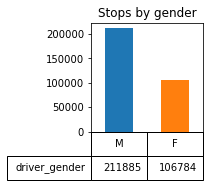

In [17]:
gender_vbar = df['driver_gender'].value_counts().plot.bar(figsize=(2, 2), title='Stops by gender', table=True)
xaxis = gender_vbar.axes.get_xaxis()
xaxis.set_visible(False)
table = gender_vbar.tables[0]
table.scale(1, 2)

### Race Breakdown

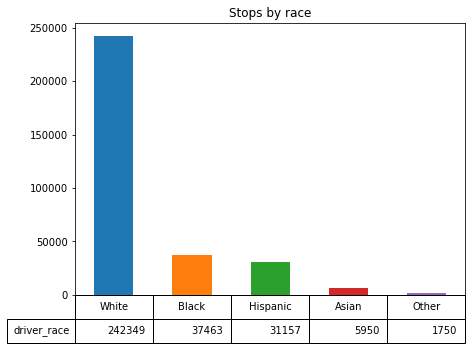

In [18]:
stops_by_race = df['driver_race'].value_counts().plot.bar(figsize=(7, 5), table=True, title='Stops by race')
stops_by_race.axes.get_xaxis().set_visible(False)
stops_by_race.tables[0].scale(1, 2)

In [19]:
df['driver_race'].value_counts(normalize=True)

White       0.760504
Black       0.117561
Hispanic    0.097772
Asian       0.018671
Other       0.005492
Name: driver_race, dtype: float64

### Proportion of searches conducted relative to all stops

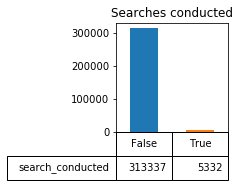

In [20]:
searches = df['search_conducted'].value_counts().plot.bar(figsize=(2, 2), title='Searches conducted', table=True)
searches.axes.get_xaxis().set_visible(False)
searches.tables[0].scale(1, 2)

In [21]:
df['search_conducted'].value_counts(normalize=True)

False    0.983268
True     0.016732
Name: search_conducted, dtype: float64

### Outcomes when searched

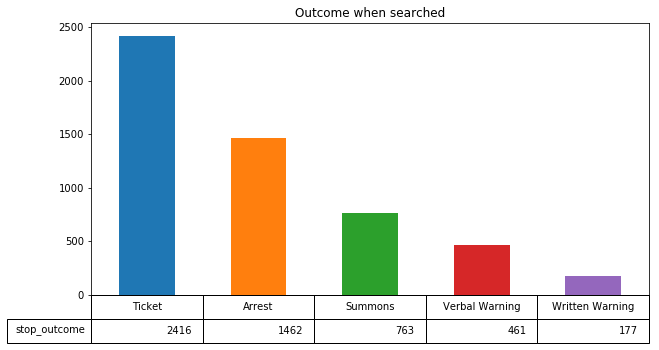

In [22]:
outcome_when_searched = df[df['search_conducted'] == True]['stop_outcome'].value_counts().plot.bar(figsize=(10, 5), title='Outcome when searched', table=True)
outcome_when_searched.axes.get_xaxis().set_visible(False)
outcome_when_searched.tables[0].scale(1, 2)

In [23]:
df[df['search_conducted'] == True]['stop_outcome'].value_counts(normalize=True)

Ticket             0.457662
Arrest             0.276946
Summons            0.144535
Verbal Warning     0.087327
Written Warning    0.033529
Name: stop_outcome, dtype: float64

D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


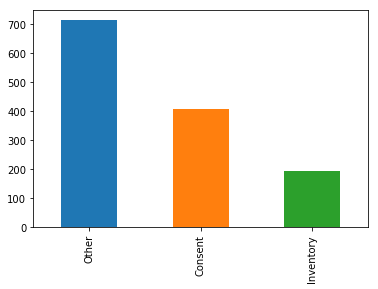

In [24]:
df[df['search_conducted']==True][df['stop_outcome']=='Arrest']['search_type_raw'].value_counts().plot.bar()

## Normalize violations

In [25]:
def normalize_violation(violation):
    if violation == 'defective lights':
        return 'lights'
    elif violation == 'equipment violation':
        return 'equipment'
    elif violation == 'other/error':
        return 'other'
    elif violation == 'registration/plates':
        return 'registration'
    elif violation == 'seat belt':
        return 'seatbelt'
    elif violation == 'speed related':
        return 'speeding'
    elif violation == 'stop sign/light' or violation == 'stop sign':
        return 'incomplete_stop'
    return violation.replace(' ', '_')


violations = []
for violation in list(df.violation.unique()) + list(df.violation_raw.unique()):
    tokens = violation.lower().split(',')
    violations.extend([normalize_violation(token) for token in tokens])

violations = sorted(set(violations))
for v in violations:
    print(v)


def merge_violations(violations):
    tokens = violations.lower().split(',')
    return list(set([normalize_violation(violation) for violation in tokens]))
    
merged = df[['violation_raw', 'violation']].apply(lambda x: ','.join(x), axis=1).apply(merge_violations)
merged[:10]

cell_phone
display_of_plates
equipment
incomplete_stop
license
lights
moving_violation
other
registration
safe_movement
seatbelt
speeding
suspended_license
traffic_control_signal
window_tint


0            [speeding]
1    [moving_violation]
2            [speeding]
3            [speeding]
4            [speeding]
5              [lights]
6               [other]
7            [speeding]
8            [speeding]
9    [moving_violation]
dtype: object

In [28]:
violation_col_headers = ['violation_{}'.format(violation.replace(' ', '_')) for violation in violations]
violation_col_headers

['violation_cell_phone',
 'violation_display_of_plates',
 'violation_equipment',
 'violation_incomplete_stop',
 'violation_license',
 'violation_lights',
 'violation_moving_violation',
 'violation_other',
 'violation_registration',
 'violation_safe_movement',
 'violation_seatbelt',
 'violation_speeding',
 'violation_suspended_license',
 'violation_traffic_control_signal',
 'violation_window_tint']

In [29]:
def onehot_encode_violations(arr_violations):
    row = np.zeros(len(violations))
    for v in arr_violations:
        row[violations.index(v)] = 1
    return row

df_violations = merged.apply(onehot_encode_violations).apply(lambda x: pd.Series(x, dtype=int))
df_violations.columns = violation_col_headers


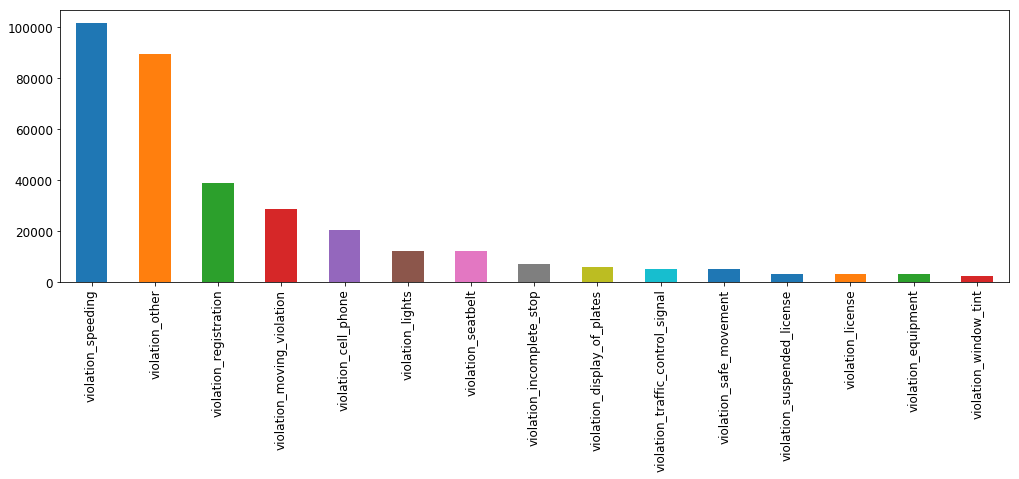

In [30]:
df_violations.sum().sort_values(ascending=False).plot.bar(figsize=(17, 5), fontsize=12)

In [31]:
df_violations.sum().sort_values(ascending=False)

violation_speeding                  101602
violation_other                      89347
violation_registration               38654
violation_moving_violation           28489
violation_cell_phone                 20224
violation_lights                     12313
violation_seatbelt                   12210
violation_incomplete_stop             7152
violation_display_of_plates           5943
violation_traffic_control_signal      5047
violation_safe_movement               5047
violation_suspended_license           3049
violation_license                     3049
violation_equipment                   3024
violation_window_tint                 2318
dtype: int64

In [32]:
df.columns.values

array(['id', 'state', 'stop_date', 'stop_time', 'location_raw',
       'county_name', 'county_fips', 'fine_grained_location',
       'police_department', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race_raw', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type_raw', 'search_type',
       'contraband_found', 'stop_outcome', 'is_arrested', 'officer_id',
       'stop_duration'], dtype=object)

# Data Preprocessing

## Null Values by column

In [33]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                   222
location_raw                 41
county_name                  42
county_fips                  42
fine_grained_location      1663
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                  274
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          313823
search_type              313823
contraband_found              0
stop_outcome               5356
is_arrested                5356
officer_id                    0
stop_duration                 0
dtype: int64

## Populate `stop_time` nulls with median value

In [34]:
populated = df['stop_time'].sort_values()
median_stop_time = populated[populated.shape[0] // 2]
print(median_stop_time)
df['stop_time'].fillna(median_stop_time, inplace=True)

08:29


In [35]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                 41
county_name                  42
county_fips                  42
fine_grained_location      1663
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                  274
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          313823
search_type              313823
contraband_found              0
stop_outcome               5356
is_arrested                5356
officer_id                    0
stop_duration                 0
dtype: int64

## Categorize `stop_time` into time-of-day: "morning, afternoon, evening, small hours"

In [36]:
def day_period(time_str):
    hour = time_str.hour

    if hour >= 0 and hour < 6:
        return 'Small Hours'
    elif hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

df['day_period'] = pd.to_datetime(df['stop_time']).apply(day_period)


## Categorize `stop_date` by season

In [37]:
def season(stop_date):
    month = datetime.strptime(stop_date, '%Y-%m-%d').month
    if month >= 3 and month < 6:
        return 'Spring'
    elif month >= 6 and month < 9:
        return 'Summer'
    elif month >= 9 and month < 12:
        return 'Fall'
    return 'Winter'

df['season'] = df['stop_date'].apply(season)

## Transform driver_gender to binary

In [38]:
df['is_male'] = df['driver_gender'].apply(lambda x: 1 if x == 'M' else 0)

In [39]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                 41
county_name                  42
county_fips                  42
fine_grained_location      1663
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                  274
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          313823
search_type              313823
contraband_found              0
stop_outcome               5356
is_arrested                5356
officer_id                    0
stop_duration                 0
day_period                    0
season                        0
is_male                       0
dtype: int64

## Drop empty `stop_outcome` rows

In [40]:
df = df.dropna(subset=['stop_outcome', 'county_name'], axis=0)

In [41]:
df.isnull().sum()

id                            0
state                         0
stop_date                     0
stop_time                     0
location_raw                  0
county_name                   0
county_fips                   0
fine_grained_location      1603
police_department             0
driver_gender                 0
driver_age_raw                0
driver_age                  145
driver_race_raw               0
driver_race                   0
violation_raw                 0
violation                     0
search_conducted              0
search_type_raw          308474
search_type              308474
contraband_found              0
stop_outcome                  0
is_arrested                   0
officer_id                    0
stop_duration                 0
day_period                    0
season                        0
is_male                       0
dtype: int64

## Drop nonessential columns

In [42]:
# Rationale for dropping certain columns
#
# - id: Not needed
# - state: All values are "CT"
# - stop_date: Converted to season
# - stop_time: Binned to day_period above
# - location_raw`:  Gives specific city values, but this may be too granular.  county_name specifies a wider area that should
#                    encompass sufficient demographics to draw insights
# - county_fips: Repetitive with county_name.
# - fine_grained_location: Too specific.  county_name should be sufficient.
# - police_department:  All values are "State police"
# - search_type_raw and search_type: Very few values and doesn't provide insight for what we're seeking to answer
# - driver_gender: one-hot encoded to is_male
# - driver_age: repetitive as driver_age_raw provides same info, plus this column has some missing values
# - driver_race_raw: repetitive with driver_race
# - officer_id: There are many officers.  It might be more insightful to find out whether there is a systemic issue at the
#               organization level rather than individual
# - is_arrested: repetitive as stop_outcome has "Arrest" value
# - violation_raw and violation: No longer needed since values have been normalized and one-hot encoded
cols_to_drop = ['id', 'state', 'stop_date', 'stop_time', 'location_raw', 'county_fips', 'fine_grained_location',
                'police_department', 'search_type_raw', 'search_type', 'driver_gender', 'driver_age', 'driver_race_raw',
                'officer_id', 'is_arrested', 'violation_raw', 'violation']
df = df.drop(cols_to_drop, axis=1)

In [43]:
df.isnull().sum()

county_name         0
driver_age_raw      0
driver_race         0
search_conducted    0
contraband_found    0
stop_outcome        0
stop_duration       0
day_period          0
season              0
is_male             0
dtype: int64

## Normalize `driver_age`

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
features_transformed = pd.DataFrame(data=df)
features_transformed['driver_age_raw'] = scaler.fit_transform(features_transformed['driver_age_raw'])
features_transformed

D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarni

,county_name,driver_age_raw,driver_race,search_conducted,contraband_found,stop_outcome,stop_duration,day_period,season,is_male
0,Fairfield County,0.696970,Black,False,False,Ticket,1-15 min,Small Hours,Fall,0
1,Tolland County,0.202020,White,False,False,Verbal Warning,1-15 min,Small Hours,Fall,1
2,New London County,0.343434,Hispanic,False,False,Ticket,1-15 min,Small Hours,Fall,1
3,Fairfield County,0.464646,Black,False,False,Written Warning,1-15 min,Small Hours,Fall,1
4,Hartford County,0.303030,White,False,False,Ticket,1-15 min,Small Hours,Fall,1
5,Fairfield County,0.252525,Black,False,False,Verbal Warning,1-15 min,Small Hours,Fall,1
6,Litchfield County,0.272727,White,False,False,Ticket,1-15 min,Small Hours,Fall,1
7,Fairfield County,0.484848,White,False,False,Verbal Warning,1-15 min,Small Hours,Fall,1
8,Hartford County,0.252525,White,False,False,Ticket,1-15 min,Small Hours,Fall,1
9,New Haven County,0.323232,White,False,False,Verbal Warning,1-15 min,Small Hours,Fall,1


## Extract target labels

In [45]:
outcomes = features_transformed.pop('stop_outcome')

In [46]:
df.columns.values

array(['county_name', 'driver_age_raw', 'driver_race', 'search_conducted',
       'contraband_found', 'stop_duration', 'day_period', 'season',
       'is_male'], dtype=object)

## One-hot encode categorical variables

In [47]:
final_features = pd.get_dummies(df)
final_features = pd.concat([final_features, df_violations], axis=1)

In [48]:
final_features.columns.values

array(['driver_age_raw', 'search_conducted', 'contraband_found', 'is_male',
       'county_name_Fairfield County', 'county_name_Hartford County',
       'county_name_Litchfield County', 'county_name_Middlesex County',
       'county_name_New Haven County', 'county_name_New London County',
       'county_name_Tolland County', 'county_name_Windham County',
       'driver_race_Asian', 'driver_race_Black', 'driver_race_Hispanic',
       'driver_race_Other', 'driver_race_White', 'stop_duration_1-15 min',
       'stop_duration_16-30 min', 'stop_duration_30+ min',
       'day_period_Afternoon', 'day_period_Evening', 'day_period_Morning',
       'day_period_Small Hours', 'season_Fall', 'season_Spring',
       'season_Summer', 'season_Winter', 'violation_cell_phone',
       'violation_display_of_plates', 'violation_equipment',
       'violation_incomplete_stop', 'violation_license',
       'violation_lights', 'violation_moving_violation', 'violation_other',
       'violation_registration', 'vio

In [49]:
len(final_features.columns.values)

43

In [50]:
final_features.iloc[:, :6].head()

,driver_age_raw,search_conducted,contraband_found,is_male,county_name_Fairfield County,county_name_Hartford County
0,0.696970,False,False,0.0,1.0,0.0
1,0.202020,False,False,1.0,0.0,0.0
2,0.343434,False,False,1.0,0.0,0.0
3,0.464646,False,False,1.0,1.0,0.0
4,0.303030,False,False,1.0,0.0,1.0


In [51]:
final_features.iloc[:, 6:11].head()

,county_name_Litchfield County,county_name_Middlesex County,county_name_New Haven County,county_name_New London County,county_name_Tolland County
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [52]:
final_features.iloc[:, 11:17].head()

,county_name_Windham County,driver_race_Asian,driver_race_Black,driver_race_Hispanic,driver_race_Other,driver_race_White
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0


In [53]:
final_features.iloc[:, 17:23].head()

,stop_duration_1-15 min,stop_duration_16-30 min,stop_duration_30+ min,day_period_Afternoon,day_period_Evening,day_period_Morning
0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0


In [54]:
final_features.iloc[:, 23:30].head()

,day_period_Small Hours,season_Fall,season_Spring,season_Summer,season_Winter,violation_cell_phone,violation_display_of_plates
0,1.0,1.0,0.0,0.0,0.0,0,0
1,1.0,1.0,0.0,0.0,0.0,0,0
2,1.0,1.0,0.0,0.0,0.0,0,0
3,1.0,1.0,0.0,0.0,0.0,0,0
4,1.0,1.0,0.0,0.0,0.0,0,0


In [55]:
final_features.iloc[:, 30:36].head()

,violation_equipment,violation_incomplete_stop,violation_license,violation_lights,violation_moving_violation,violation_other
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [56]:
final_features.iloc[:, 36:41].head()

,violation_registration,violation_safe_movement,violation_seatbelt,violation_speeding,violation_suspended_license
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [57]:
final_features.iloc[:, 41:44].head()

,violation_traffic_control_signal,violation_window_tint
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
